In [1]:
#ЭКЗАМЕНАЦИОННАЯ РАБОТА  2021 МАХМАДЗИЁЕВ АЛИ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df0 = pd.read_csv('payment_fraud.csv')

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
le = LabelEncoder()

In [4]:
le.fit(df0.paymentMethod)

LabelEncoder()

In [5]:
# df0['paymentMethod'] = le.transform(df0.paymentMethod)

In [6]:
df0 = pd.get_dummies(df0, columns=["paymentMethod"])

In [7]:
df0

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
0,29,1,4.745402,28.204861,0,1,0
1,725,1,4.742303,0.000000,0,0,1
2,845,1,4.921318,0.000000,1,0,0
3,503,1,4.886641,0.000000,1,0,0
4,2000,1,5.040929,0.000000,1,0,0
...,...,...,...,...,...,...,...
39216,986,1,4.836982,0.000000,1,0,0
39217,1647,1,4.876771,377.930556,1,0,0
39218,1591,1,4.742303,0.000000,1,0,0
39219,237,1,4.921318,236.082639,1,0,0


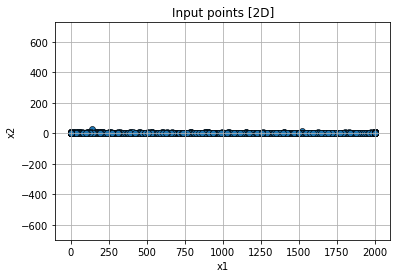

In [8]:
plt.figure()
plt.grid()
plt.scatter(df0['accountAgeDays'], df0['numItems'],  edgecolor='black',
lw=.6, cmap='jet')
plt.title("Input points [2D]")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

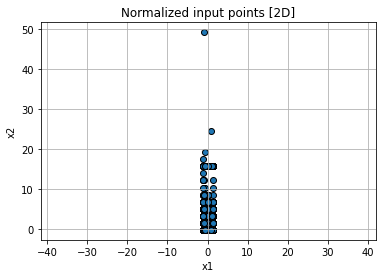

In [9]:
# Нормализуем данные
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = df0.copy()
df1.iloc[:, :-1] = ss.fit_transform(df1.iloc[:, :-1])
plt.figure()
plt.grid()
plt.scatter(df1['accountAgeDays'], df1['numItems'],  edgecolor='black',
cmap='jet')
plt.title("Normalized input points [2D]")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

[[-8.13495363e-03 -7.20132082e-03 -1.75126065e-03 -5.91142410e-03
  -7.07057902e-01  7.07045313e-01]
 [ 7.02269669e-01  1.71489879e-05 -9.64051944e-02  7.05285134e-01
  -5.90372838e-03  7.83427271e-03]
 [-1.31087214e-01  7.35839644e-01 -6.63143608e-01  3.98192980e-02
  -2.65757849e-03  2.01913298e-03]
 [-2.60580205e-03  6.62438161e-01  7.41843346e-01  1.03889105e-01
  -4.71156472e-03  4.71140411e-03]
 [ 6.99684367e-01  1.40227628e-01 -2.47376978e-02 -7.00113709e-01
  -1.28655698e-03  2.27717021e-03]
 [ 1.50803031e-03 -2.33957045e-04  1.50376320e-04  4.54442267e-04
  -7.07109152e-01 -7.07102602e-01]]


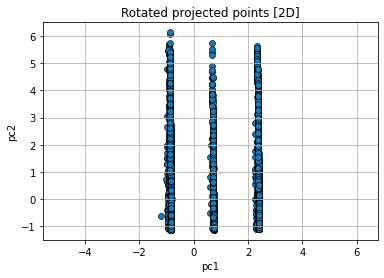

In [10]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full') #n_components=2
df2 = df1.copy()
df2.iloc[:, :-1] = pca.fit_transform(df2.iloc[:, :-1])
df2.columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6', 'pc7']
print(pca.components_) #!
plt.figure()
plt.grid()
plt.scatter(df2['pc1'], df2['pc2'], edgecolor='black',
lw=.6, cmap='jet')
plt.title("Rotated projected points [2D]")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.axis('equal')
plt.show()

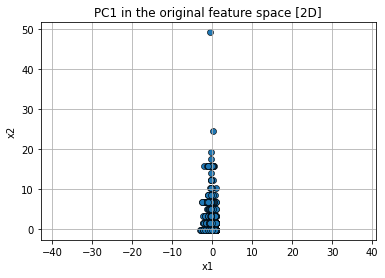

In [11]:
df3 = df2.copy()
df3['pc2'] = 0 #!
df3.iloc[:, :-1] = pca.inverse_transform(df3.iloc[:, :-1])
df3.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x7']
plt.figure()
plt.grid()
plt.scatter(df3['x1'], df3['x2'], edgecolor='black',
lw=.6, cmap='jet')
plt.title("PC1 in the original feature space [2D]")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

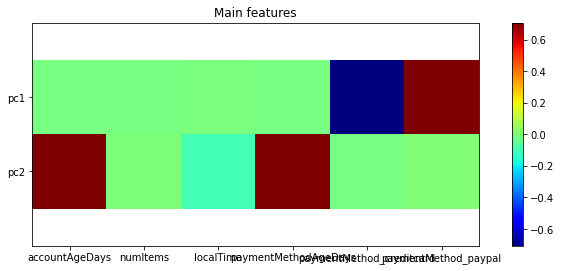

In [12]:
plt.matshow(pca.components_[:2], cmap='jet')
plt.colorbar()
plt.gca().xaxis.tick_bottom()
plt.xticks(range(len(df0.columns) - 1), df0.iloc[:, :-1].columns)
plt.yticks(range(2), df2.iloc[:, :2].columns)
plt.title("Main features")
i, k = plt.ylim() #
plt.ylim(i+0.5, k-0.5) #
plt.show()